# PyTimber Tutorial
<hr style="border-top-width: 4px; border-top-color: #34609b;">

Accessing the CERN logging database and extracting machine parameters.

In [1]:
# Enable an interactive mode for Matplotlib plots
%matplotlib notebook

import pytimber
import time

In [3]:
db = pytimber.LoggingDB(spark_session=spark)
print(pytimber.__version__)

4.1.3.44


## Search for parameters

Use the wildcard %

In [4]:
db.search_variables("%BEAM_INTENSITY%")

['LHC.BCTFR.B6R4.B1:BEAM_INTENSITY',
 'LHC.BCTDC.B6R4.B1:BEAM_INTENSITY',
 'LHC.BCTFR.B6R4.B1:BEAM_INTENSITY_LOBW',
 'LHC.BCTDC.A6R4.B2:BEAM_INTENSITY',
 'LHC.BCTFR.B6R4.B2:BEAM_INTENSITY_LOBW',
 'LHC.BCTFR.B6R4.B2.DEV:BEAM_INTENSITY_HBW',
 'LHC.BCTFR.B6R4.B1.DEV:BEAM_INTENSITY_HBW',
 'LHC.BCTFR.B6R4.B2:BEAM_INTENSITY',
 'LHC.BCTDC.B6R4.B2:BEAM_INTENSITY_ADC24BIT',
 'LHC.BWCM.B2:BEAM_INTENSITY',
 'LHC.BCTDC.A6R4.B1:BEAM_INTENSITY',
 'LHC.BCTFR.A6R4.B1:BEAM_INTENSITY_LOBW',
 'LHC.BCTFR.A6R4.B1:BEAM_INTENSITY',
 'LHC.BCTFR.A6R4.B2:BEAM_INTENSITY',
 'LHC.BCTDC.B6R4.B2:BEAM_INTENSITY',
 'LHC.BCTFR.A6R4.B2:BEAM_INTENSITY_LOBW',
 'SPS.TEST.BSRTCTL:BEAM_INTENSITY_E10',
 'LHC.BCTDC.B6R4.B1:BEAM_INTENSITY_ADC24BIT',
 'LHC.BWCM.B1:BEAM_INTENSITY',
 'LHC.BCTDC.A6R4.B2:BEAM_INTENSITY_ADC24BIT',
 'LHC.BCTFR.B6R4.B1.DEV:BEAM_INTENSITY_LBW',
 'LHC.BCTFR.B6R4.B2.DEV:BEAM_INTENSITY_LBW',
 'LHC.BCTDC.A6R4.B1:BEAM_INTENSITY_ADC24BIT']

## Explore the parameter tree

use the ipython autocomplete (TAB) after db. to see other methods interactively

In [7]:
db.get_variables_for_hierarchies("/LHC/Beam_Quality/Beam_1")

{'/LHC/Beam Quality/Beam 1': ['LHC.BQM.B1:BUNCH_PEAK_MAX',
  'LHC.BQM.B1:BUNCH_LENGTHS',
  'LHC.BQM.B1:BUNCH_LENGTH_CUT3_MIN',
  'LHC.BQM.B1:NO_BUNCHES',
  'LHC.BQM.B1:BUNCH_INTENSITY_MIN',
  'LHC.BQM.B1:ADC_WAVEFORM',
  'LHC.BQM.B1:BUNCH_LENGTH_MEAN',
  'LHC.BQM.B1:ADC_AQUISITION_MAX',
  'LHC.BQM.B1:BUNCH_PEAK_MEAN',
  'LHC.BQM.B1:ADC_AQUISITION_MIN',
  'LHC.BQM.B1:BUNCH_LENGTH_CUT1_MIN',
  'LHC.BQM.B1:BUNCH_LENGTH_MAX',
  'LHC.BQM.B1:BUNCH_PEAK_STDDEV',
  'LHC.BQM.B1:BUNCH_LENGTH_CUT2_MIN',
  'LHC.BQM.B1:BUNCH_LENGTH_CUT2_MEAN',
  'LHC.BQM.B1:BUNCH_LENGTH_CUT1_MEAN',
  'LHC.BQM.B1:BUNCH_INTENSITY_MEAN',
  'LHC.BQM.B1:FILLED_BUCKETS',
  'LHC.BQM.B1:BUNCH_LENGTH_CUT3_STDDEV',
  'LHC.BQM.B1:BUNCH_PEAK_MIN',
  'LHC.BQM.B1:BUNCH_LENGTH_CUT2_STDDEV',
  'LHC.BQM.B1:BUNCH_INTENSITY_MAX',
  'LHC.BQM.B1:BUNCH_LENGTH_CUT2_MAX',
  'LHC.BQM.B1:ATTENUATION',
  'LHC.BQM.B1:BUNCH_INTENSITIES',
  'LHC.BQM.B1:BUNCH_LENGTH_CUT3_MEAN',
  'LHC.BQM.B1:BUNCH_LENGTH_CUT1_MAX',
  'LHC.BQM.B1:BUNCH_LENGTHS_CU

## Get Data

Specify a variable name and a timestamp or an interval. Data is always returned as a dictionary of timestamp, values arrays.


In [6]:
db.get("HX:FILLN", time.time())

{'HX:FILLN': (array([1.69865159e+09]), array([9322], dtype=int32))}

### Scaling algorithms

getScaled can be used to exploit the time scaling functionality of Timber. Specify 
- the scaleSize (an integer) 
- the scaleInterval (one of ['SECOND', 'MINUTE', 'HOUR', 'DAY', 'WEEK', 'MONTH', 'YEAR'])  
- the scaling algorithm (one of ['MAX','MIN','AVG','COUNT','SUM','REPEAT','INTERPOLATE'])

In [20]:
db.get_scaled('MSC01.ZT8.107:COUNTS','2016-08-03 16:30:00.000','2016-08-03 18:30:00.000',
             scale_algorithm=pytimber.ScaleAlgorithm.SUM, scale_size=1, scale_interval=pytimber.ScaleInterval.MINUTE)

{'MSC01.ZT8.107:COUNTS': (array([1.47023820e+09, 1.47023826e+09, 1.47023832e+09, 1.47023838e+09,
         1.47023844e+09, 1.47023850e+09, 1.47023856e+09, 1.47023862e+09,
         1.47023868e+09, 1.47023874e+09, 1.47023880e+09, 1.47023886e+09,
         1.47023892e+09, 1.47023898e+09, 1.47023904e+09, 1.47023910e+09,
         1.47023916e+09, 1.47023922e+09, 1.47023928e+09, 1.47023934e+09,
         1.47023940e+09, 1.47023946e+09, 1.47023952e+09, 1.47023958e+09,
         1.47023964e+09, 1.47023970e+09, 1.47023976e+09, 1.47023982e+09,
         1.47023988e+09, 1.47023994e+09, 1.47024000e+09, 1.47024006e+09,
         1.47024012e+09, 1.47024018e+09, 1.47024024e+09, 1.47024030e+09,
         1.47024036e+09, 1.47024042e+09, 1.47024048e+09, 1.47024054e+09,
         1.47024060e+09, 1.47024066e+09, 1.47024072e+09, 1.47024078e+09,
         1.47024084e+09, 1.47024090e+09, 1.47024096e+09, 1.47024102e+09,
         1.47024108e+09, 1.47024114e+09, 1.47024120e+09, 1.47024126e+09,
         1.47024132e+09, 1.

## Timestamps

Timestamps can be give as floating point number, strings, datatime objects.

If only one timestamp is given the last value logged prior to the timestamp is given.

If the second argument is 'next' the first value logged after the timestamp is given.

If two timestamps are given the values logged in between (inclusively) are given.

Timestamp are returned as unix timestamp (seconds and fraction from 1970-01-01 00:00:00 GMT) or optionally as datetime object.

In [4]:
from datetime import datetime

now=time.time()
"The unixtime `%.3f` correspond to `%s` local time."%(now, datetime.fromtimestamp(now))

'The unixtime `1702453877.169` correspond to `2023-12-13 08:51:17.168514` local time.'

In [5]:
db.get("HX:FILLN",time.time())

/cvmfs/sft.cern.ch/lcg/views/LCG_102b_nxcals_pro_pytimber_pro/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/pytimber/utils.py:101: UserWarning: Timedelta is a deprecated input parameter type, use other types.
  warnings.warn("Timedelta is a deprecated input parameter type, use other types.")


{'HX:FILLN': (array([1.69865159e+09]), array([9322], dtype=int32))}

In [6]:
db.get("HX:FILLN",'2016-08-03 16:30:00.000')

/cvmfs/sft.cern.ch/lcg/views/LCG_102b_nxcals_pro_pytimber_pro/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/pytimber/utils.py:101: UserWarning: Timedelta is a deprecated input parameter type, use other types.
  warnings.warn("Timedelta is a deprecated input parameter type, use other types.")


{'HX:FILLN': (array([1.47023754e+09]), array([5161], dtype=int32))}

In [7]:
db.get("HX:FILLN",'2016-08-03 16:30:00.000',unixtime=False)

{'HX:FILLN': (array([datetime.datetime(2016, 8, 3, 15, 18, 56, 318000, tzinfo=<UTC>)],
        dtype=object),
  array([5161], dtype=int32))}

In [8]:
db.get("HX:FILLN",'2016-08-01 16:30:00.000','next')

{'HX:FILLN': (array([1.47007645e+09]), array([5152], dtype=int32))}

In [9]:
db.get("HX:FILLN",'2016-08-02 16:30:00.000','2016-08-03 16:30:00.000')

{'HX:FILLN': (array([1.47019695e+09, 1.47019821e+09, 1.47020552e+09, 1.47022719e+09,
         1.47023754e+09]),
  array([5157, 5158, 5159, 5160, 5161], dtype=int32))}

## Variables

Variables can be given as a string, as a pattern, as a list of strings.

In [ ]:
db.get("LHC.BCTDC.A6R4.B1:BEAM_INTENSITY",now)

In [37]:
db.get("LHC.BCTDC.A6R4.B%:BEAM_INTENSITY",now)

{'LHC.BCTDC.A6R4.B1:BEAM_INTENSITY': (array([1.70237804e+09]),
  array([-2.72483672e+09])),
 'LHC.BCTDC.A6R4.B2:BEAM_INTENSITY': (array([1.70237804e+09]),
  array([-1.25621122e+08]))}

In [38]:
db.get(["LHC.BCTDC.A6R4.B1:BEAM_INTENSITY","LHC.BCTDC.A6R4.B2:BEAM_INTENSITY"],now)

{'LHC.BCTDC.A6R4.B1:BEAM_INTENSITY': (array([1.70237804e+09]),
  array([-2.72483672e+09])),
 'LHC.BCTDC.A6R4.B2:BEAM_INTENSITY': (array([1.70237804e+09]),
  array([-1.25621122e+08]))}

## Values

Values can be scalar (floating point values or string) or vectors. If in a query the length of the vectors is the same, as 2D array is returned, else a list of arrays is returned instead.

In [14]:
# prepare for plotting
%matplotlib notebook
import matplotlib.pyplot as pl

/cvmfs/sft.cern.ch/lcg/views/LCG_102b_nxcals_pro_pytimber_pro/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/pytimber/utils.py:101: UserWarning: Timedelta is a deprecated input parameter type, use other types.
  warnings.warn("Timedelta is a deprecated input parameter type, use other types.")


<IPython.core.display.Javascript object>


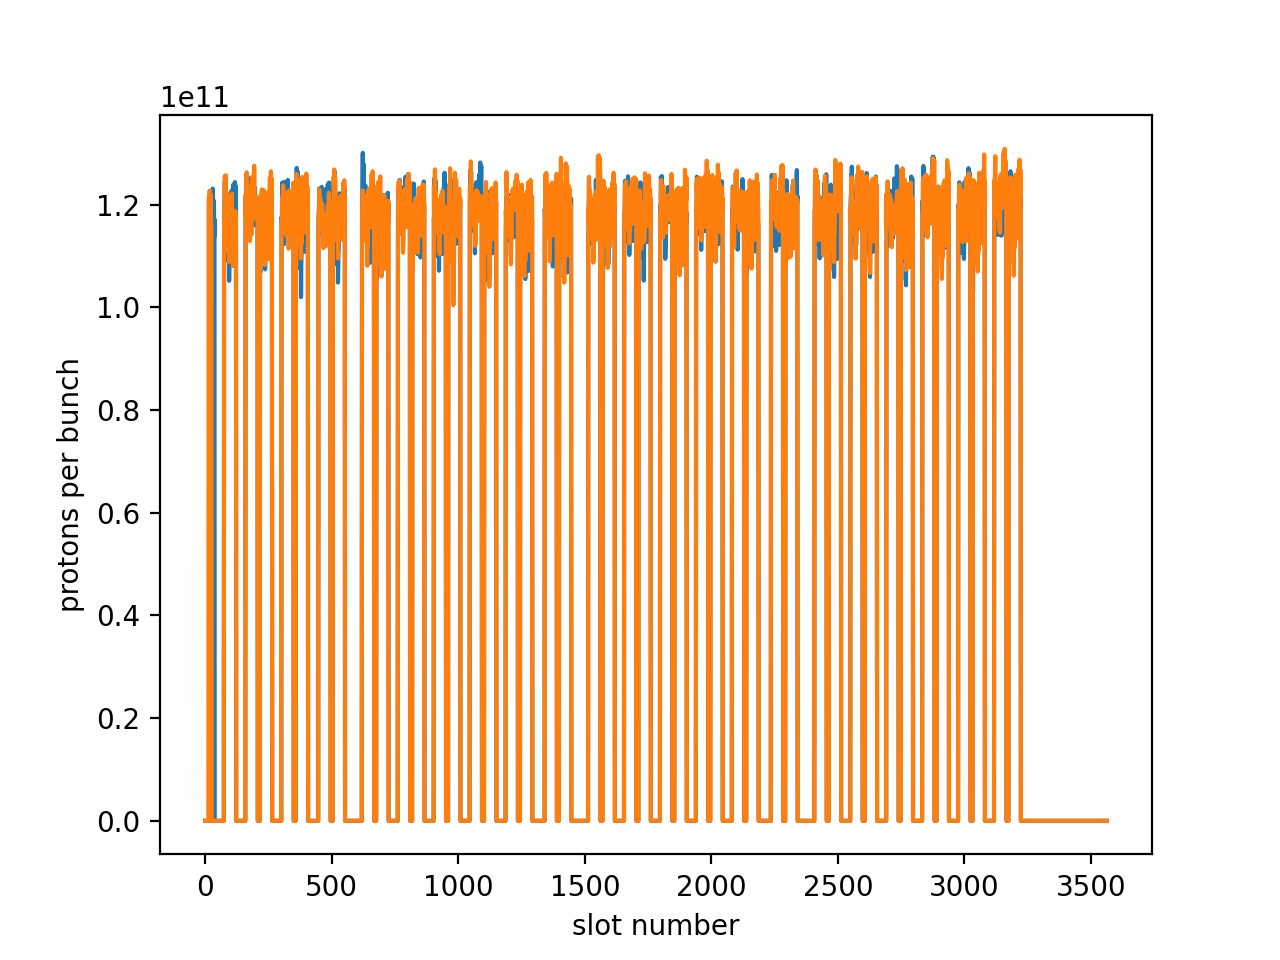

Text(0, 0.5, 'protons per bunch')

In [24]:
ts = "2016-07-01 03:10:15"
ib1 = "LHC.BCTFR.A6R4.B1:BUNCH_INTENSITY"
ib2 = "LHC.BCTFR.A6R4.B2:BUNCH_INTENSITY"
data = db.get([ib1, ib2], ts, 'next')
timestamps, valuesb1 = data[ib1]
timestamps, valuesb2 = data[ib2]
pl.figure()
pl.plot(valuesb1[0])
pl.plot(valuesb2[0])
pl.xlabel("slot number")
pl.ylabel("protons per bunch")

In [32]:
print(valuesb1[0])

[0. 0. 0. ... 0. 0. 0.]


In [41]:
t1 = "2016-07-01 03:10:15.000"
t2 = "2016-07-01 03:11:15.000"
ib1 = "LHC.BCTFR.A6R4.B1:BUNCH_INTENSITY"
ib2 = "LHC.BCTFR.A6R4.B2:BUNCH_INTENSITY"

# Get data for ib1 and ib2
data = db.get([ib1, ib2], t1, t2)

# Unpack the data for ib1 and ib2
timestamps_ib1, values_ib1 = data[ib1]
timestamps_ib2, values_ib2 = data[ib2]

# Reshape the values for ib1 and ib2
valuesb1 = values_ib1[0].reshape((1, -1))
valuesb2 = values_ib2[0].reshape((1, -1))

<IPython.core.display.Javascript object>


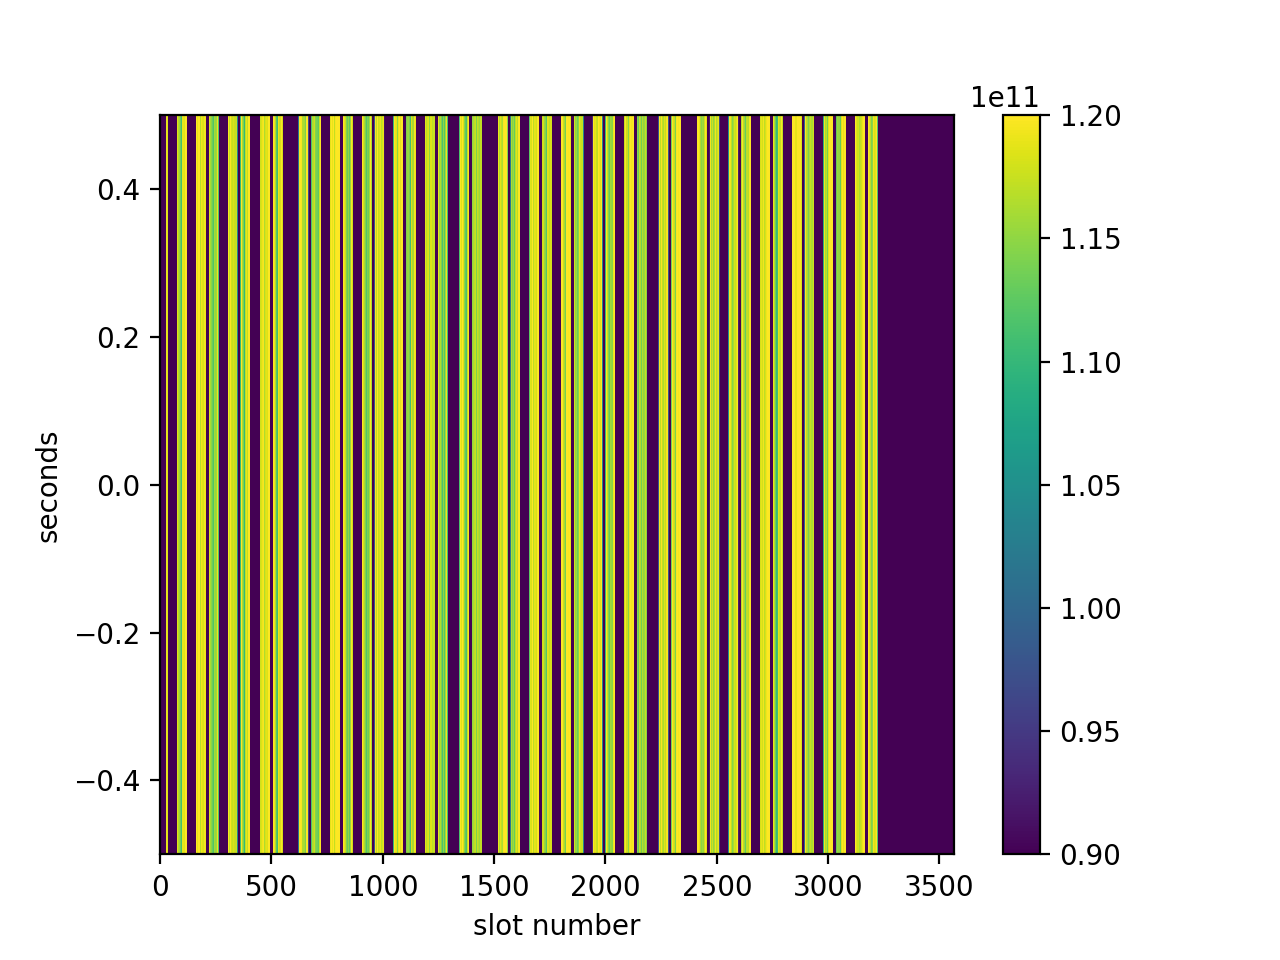

In [43]:
pl.figure()
pl.imshow(valuesb1, aspect='auto', origin='lower')
pl.ylabel('seconds')
pl.xlabel("slot number")
pl.colorbar()
pl.clim(9e10, 12e10)


<IPython.core.display.Javascript object>


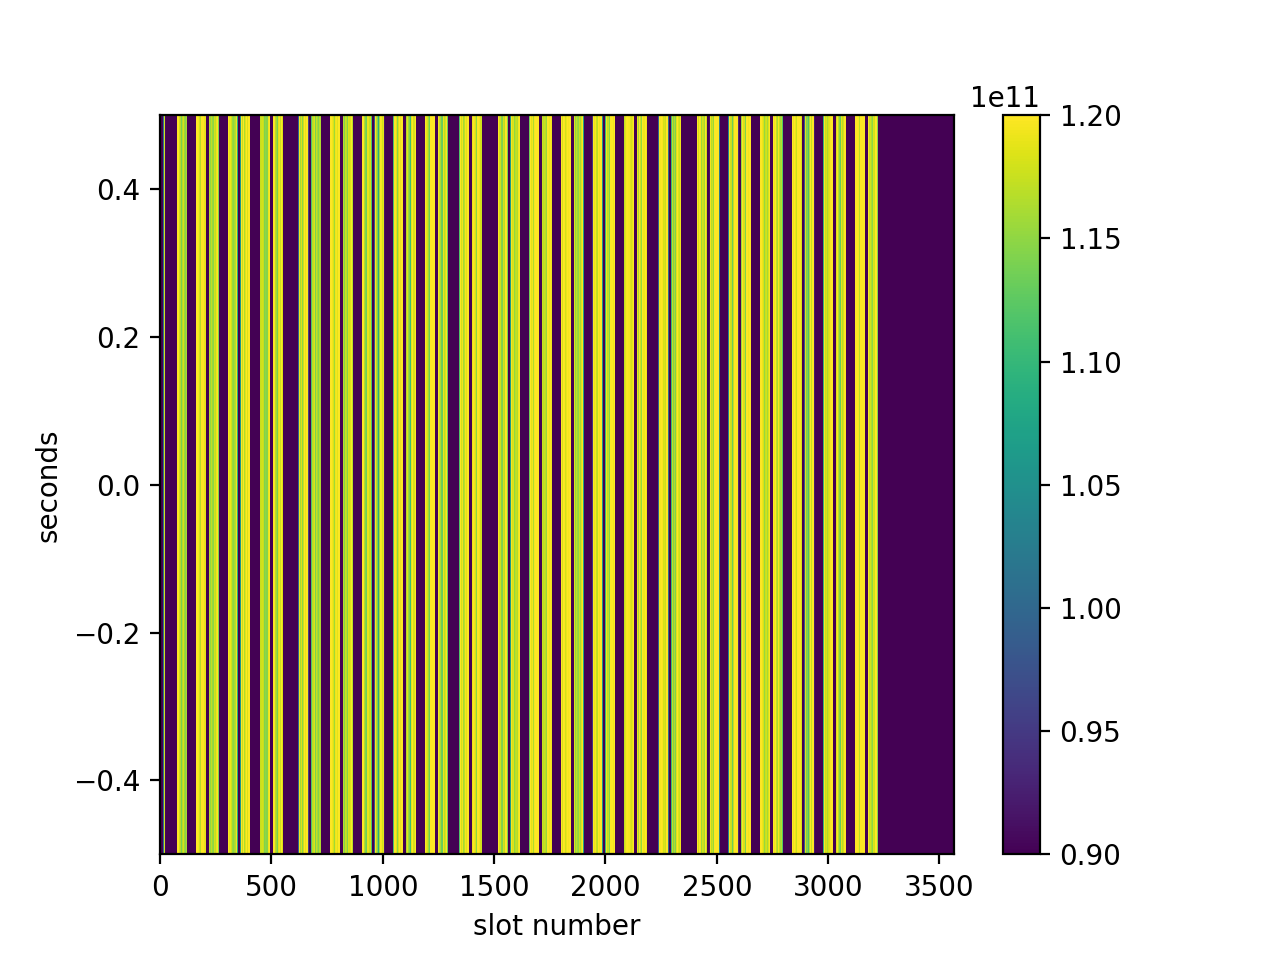

In [40]:
pl.figure()
pl.imshow(valuesb2, aspect='auto', origin='lower')
pl.ylabel('seconds')
pl.xlabel("slot number")
pl.colorbar()
pl.clim(9e10, 12e10)